 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Read in whale returns
whale_returns = Path("Resources/whale_returns.csv")
df = pd.read_csv(
    whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
df = df.sort_index()
df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [3]:
# of nulls
df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Dropna
df = df.dropna().copy()
df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")
df2 = pd.read_csv(
    algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
df2 = df2.sort_index()
df2.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [6]:
# of nulls
df2.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Dropna
df2 = df2.dropna().copy()
df2.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history = Path("Resources/sp500_history.csv")
df3 = pd.read_csv(
    sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)
df3 = df3.sort_index()
df3.head(10)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
2012-10-08,$1455.88
2012-10-09,$1441.48
2012-10-10,$1432.56
2012-10-11,$1432.84


In [9]:
# Check Data Types
df3.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
df3["Close"] = df3["Close"].str.replace("$", "")
df3["Close"] = df3["Close"].str.replace(",", "")
df3["Close"] = df3["Close"].astype("float")
df3.dtypes

<ipython-input-10-6ad7e7366a38>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df3["Close"] = df3["Close"].str.replace("$", "")


Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
df3 = df3.pct_change()
df3.head(10)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188
2012-10-11,0.000195


In [12]:
# Drop nulls
df3 = df3.dropna().copy()
df3.head(10)

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188
2012-10-11,0.000195
2012-10-12,-0.002966


In [13]:
# Rename `Close` Column to be specific to this portfolio.
df3 = df3.rename(columns={"Close": "S&P 500"})
df3.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df4 = pd.concat([df, df2, df3], axis="columns", join="inner")
df4.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

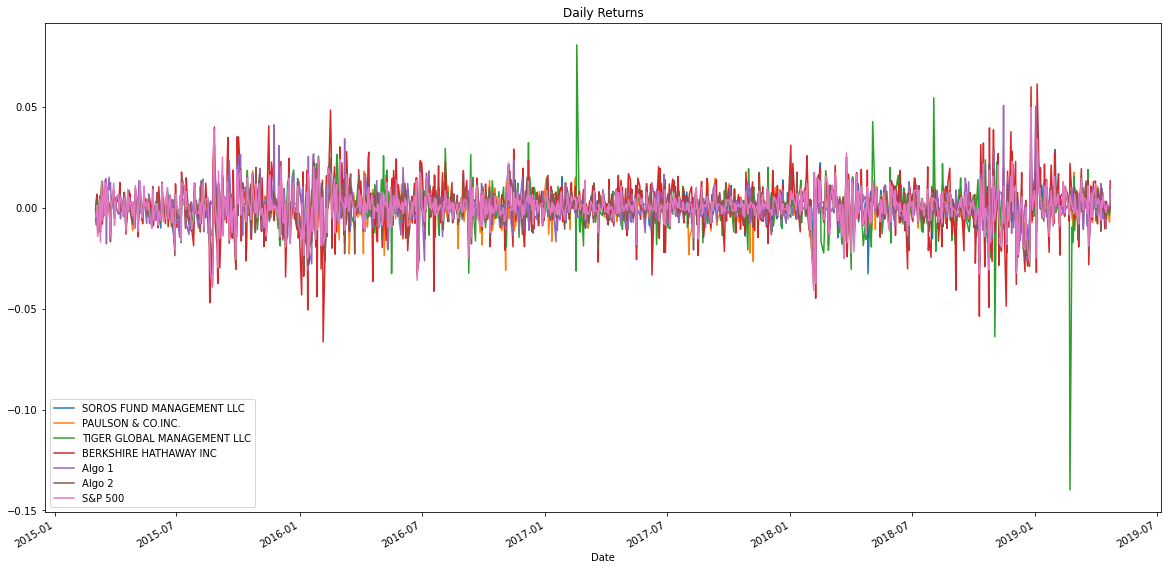

In [15]:
# Plot daily returns of all portfolios
df4.plot(figsize=(20, 10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

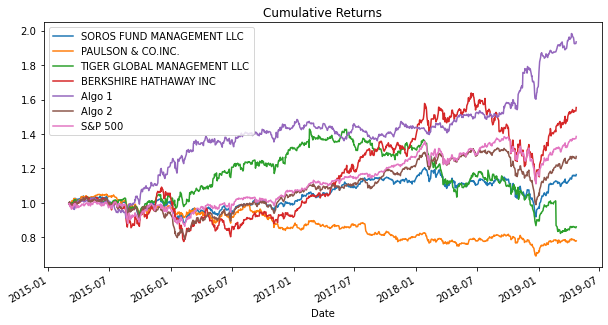

In [16]:
#cumulative returns of all portfolios
df4 = (1 + df4).cumprod()

# Plot cumulative returns
df4.plot(figsize=(10, 5), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

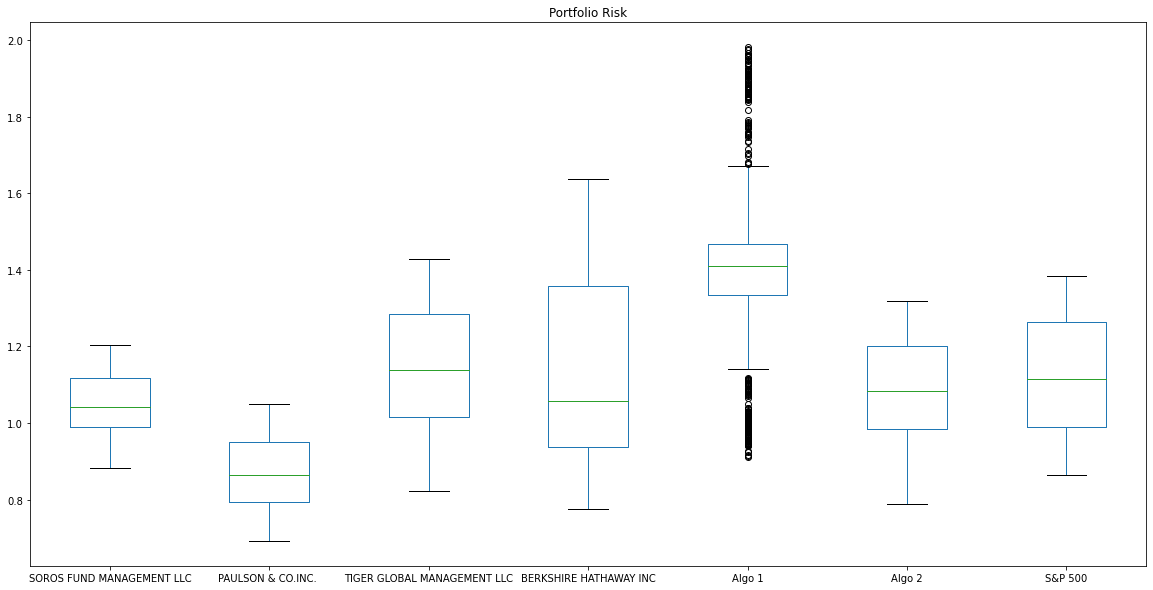

In [17]:
# Box plot to visually show risk
df4.plot.box(figsize=(20, 10), title="Portfolio Risk")

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
df4.std()

SOROS FUND MANAGEMENT LLC      0.073238
PAULSON & CO.INC.              0.088455
TIGER GLOBAL MANAGEMENT LLC    0.149844
BERKSHIRE HATHAWAY INC         0.241575
Algo 1                         0.232277
Algo 2                         0.131700
S&P 500                        0.144448
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
df5 = df4["S&P 500"].std()

# Determine which portfolios are riskier than the S&P 500
df4.std() > df5

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                         False
S&P 500                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
df6 = df4.std() * np.sqrt(252)
df6

SOROS FUND MANAGEMENT LLC      1.162620
PAULSON & CO.INC.              1.404180
TIGER GLOBAL MANAGEMENT LLC    2.378706
BERKSHIRE HATHAWAY INC         3.834878
Algo 1                         3.687285
Algo 2                         2.090678
S&P 500                        2.293036
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Calculate and plot a 60-day Beta for Berkshire Hathaway Inc compared to the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

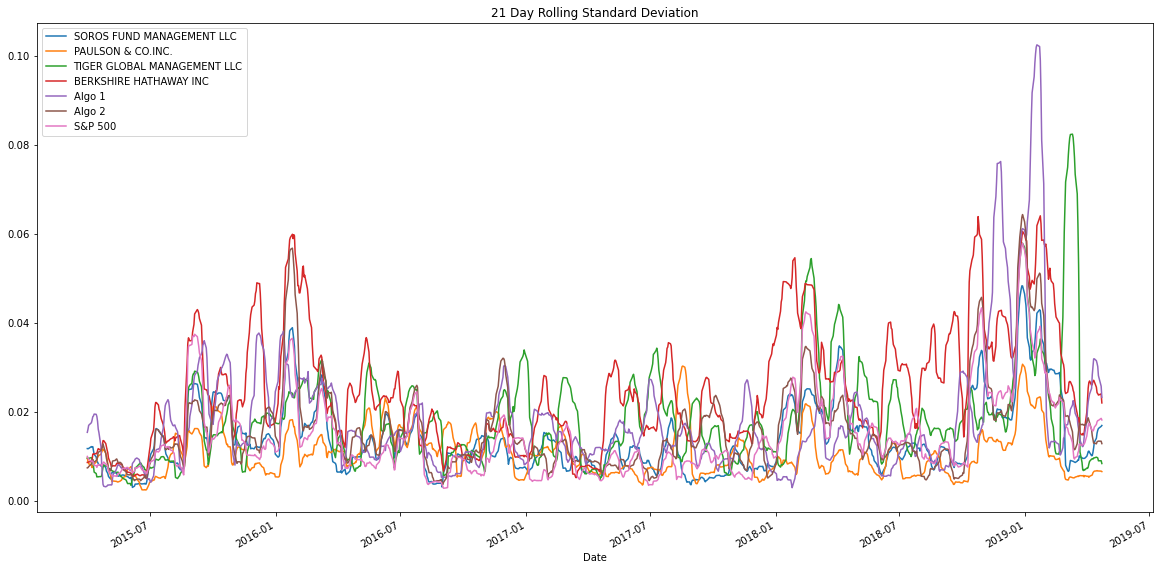

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df7 =df4.rolling(window=21).std()

# Plot the rolling standard deviation
df7.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
corr_df = df4.corr()

# Display de correlation matrix
corr_df.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,-0.653129,0.327728,0.898896,0.470156,0.915163,0.875512
PAULSON & CO.INC.,-0.653129,1.000000,-0.193595,-0.780559,-0.830635,-0.767196,-0.853201
TIGER GLOBAL MANAGEMENT LLC,0.327728,-0.193595,1.000000,0.031632,0.052669,0.177653,0.131595
BERKSHIRE HATHAWAY INC,0.898896,-0.780559,0.031632,1.000000,0.579663,0.945500,0.938546
Algo 1,0.470156,-0.830635,0.052669,0.579663,1.000000,0.588982,0.740215
Algo 2,0.915163,-0.767196,0.177653,0.945500,0.588982,1.000000,0.965884
S&P 500,0.875512,-0.853201,0.131595,0.938546,0.740215,0.965884,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Berkshire Hathaway Inc. Beta'}, xlabel='Date'>

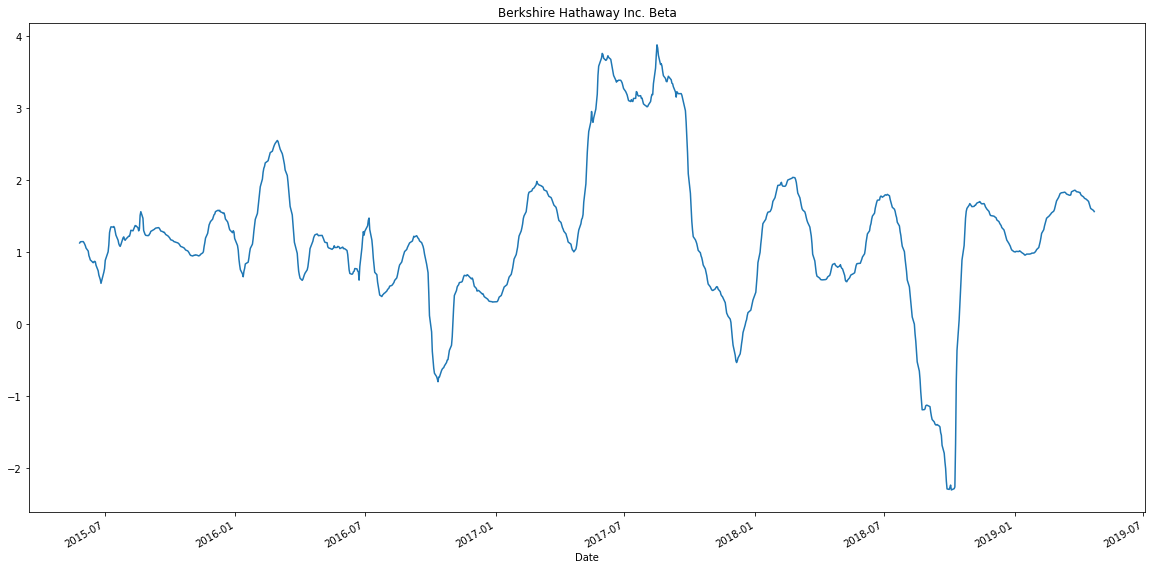

In [23]:
# Calculate covariance of a single portfolio
covariance = df4["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(df4["S&P 500"])

# Calculate variance of S&P TSX
variance = df4["S&P 500"].rolling(60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(20, 10), title="Berkshire Hathaway Inc. Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

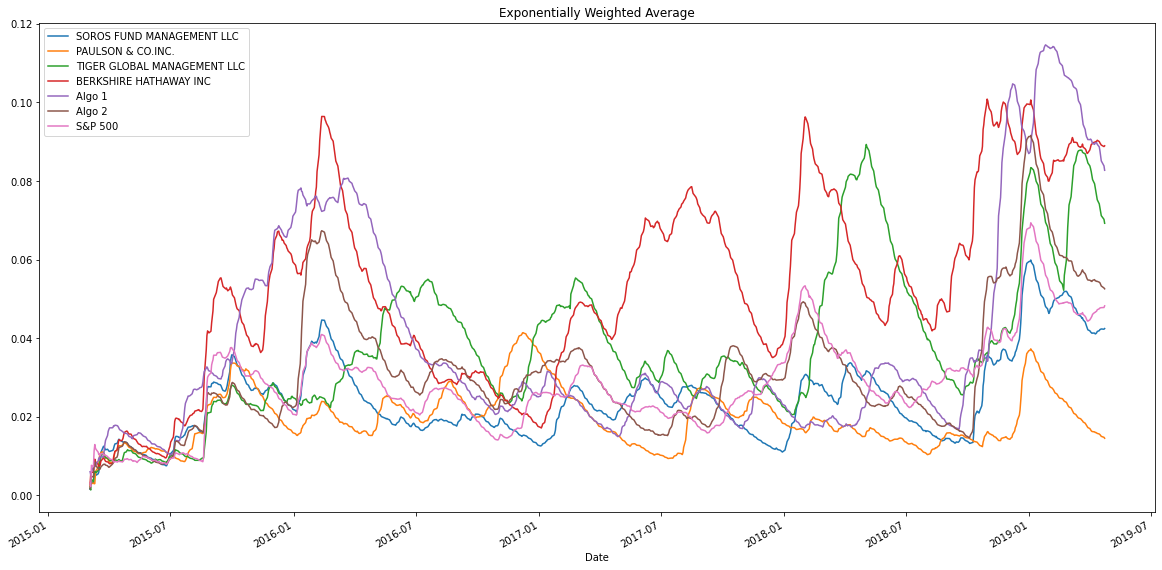

In [24]:
df4.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = (df4.mean() * 252) / (df4.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      227.552462
PAULSON & CO.INC.              157.217634
TIGER GLOBAL MANAGEMENT LLC    121.615471
BERKSHIRE HATHAWAY INC          76.201626
Algo 1                          94.927346
Algo 2                         131.015483
S&P 500                        123.476112
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

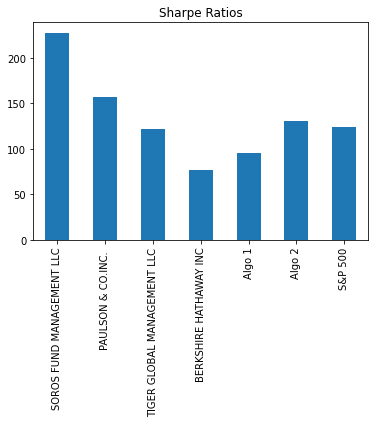

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listed in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [27]:
# Reading data from 1st stock
google_historical_csv = Path("Resources/goog_historical.csv")
google_historical = pd.read_csv(
    google_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google_historical = google_historical.sort_index()
google_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [28]:
# Reading data from 2nd stock
apple_historical_csv = Path("Resources/aapl_historical.csv")
apple_historical = pd.read_csv(
    apple_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple_historical = apple_historical.sort_index()
apple_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [29]:
# Reading data from 3rd stock
costco_historical_csv = Path("Resources/cost_historical.csv")
costco_historical = pd.read_csv(
    costco_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
costco_historical = costco_historical.sort_index()
costco_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [30]:
# Combine all stocks in a single DataFrame
combined = pd.concat([google_historical, apple_historical, costco_historical], axis="rows", join="inner")
combined.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [31]:
# Reset Date index
combined = combined.reset_index()
combined.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [32]:
# Reorganize portfolio data by having a column per symbol
portfolio = combined.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [33]:
# Calculate daily returns
daily_returns = portfolio.pct_change()

# Drop NAs
daily_returns = daily_returns.dropna().copy()

# Display sample data
daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame

df4["Custom"] = portfolio_returns
df4.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,1.372945,0.000340
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,1.369823,0.009292
2019-04-18,1.159278,0.782678,0.858778,1.534716,1.923823,1.259590,1.371986,0.001545
2019-04-22,1.156280,0.776939,0.855652,1.533046,1.925124,1.257151,1.373375,0.001217
2019-04-23,1.164568,0.779646,0.861189,1.553401,1.934691,1.269247,1.385517,0.011959


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df4 = df4.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
risk = df4.std() * np.sqrt(252)
risk

SOROS FUND MANAGEMENT LLC      0.739882
PAULSON & CO.INC.              0.363220
TIGER GLOBAL MANAGEMENT LLC    1.786935
BERKSHIRE HATHAWAY INC         1.951823
Algo 1                         2.705186
Algo 2                         1.194013
S&P 500                        0.822697
Custom                         0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

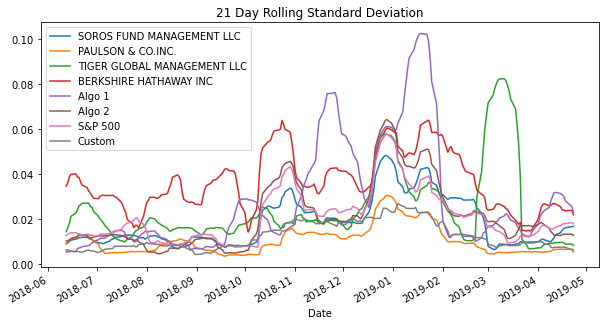

In [39]:
# Calculate rolling standard deviation
rolling_std_dev = df4.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std_dev.plot(figsize=(10, 5), title="21 Day Rolling Standard Deviation")

### Calculate and plot the correlation

In [40]:
# Calculate and plot the correlation

df9 = df4.corr()
df9.style.background_gradient(cmap="bwr")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.766352,0.249589,0.837045,-0.102498,0.904978,0.911231,0.174093
PAULSON & CO.INC.,0.766352,1.000000,0.478086,0.450119,-0.294044,0.778048,0.871990,0.075526
TIGER GLOBAL MANAGEMENT LLC,0.249589,0.478086,1.000000,0.333195,-0.895177,0.542598,0.238195,-0.023641
BERKSHIRE HATHAWAY INC,0.837045,0.450119,0.333195,1.000000,-0.281195,0.864505,0.642193,0.195854
Algo 1,-0.102498,-0.294044,-0.895177,-0.281195,1.000000,-0.470955,-0.129560,0.065425
Algo 2,0.904978,0.778048,0.542598,0.864505,-0.470955,1.000000,0.857215,0.116683
S&P 500,0.911231,0.871990,0.238195,0.642193,-0.129560,0.857215,1.000000,0.150286
Custom,0.174093,0.075526,-0.023641,0.195854,0.065425,0.116683,0.150286,1.000000


### Calculate and Plot Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Custom Portfolio Beta'}, xlabel='Date'>

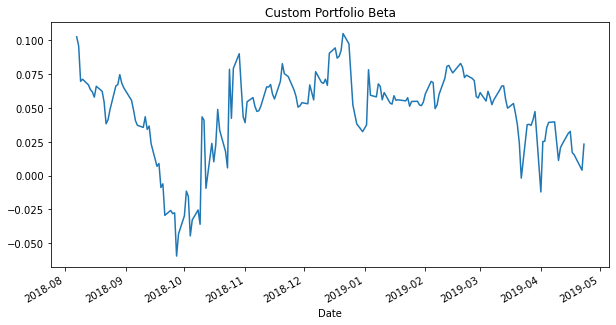

In [41]:
# Calculate and plot Beta
covariance = df4["Custom"].rolling(window=60).cov(df4["S&P 500"])
variance = df4["S&P 500"].rolling(60).var()
beta = (covariance / variance)
beta.plot(figsize=(10, 5), title="Custom Portfolio Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (df4.mean() * 252) / (df4.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      373.438559
PAULSON & CO.INC.              541.596339
TIGER GLOBAL MANAGEMENT LLC    145.861397
BERKSHIRE HATHAWAY INC         184.628864
Algo 1                         156.167990
Algo 2                         259.484172
S&P 500                        399.829787
Custom                           0.933123
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

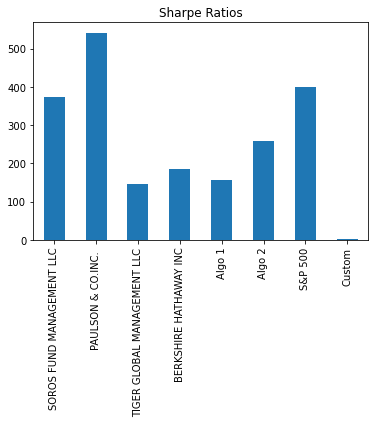

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!